In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# 设置全局字体为 Times New Roman
plt.rc('font',family='Times New Roman')
warnings.filterwarnings('ignore')

# 数据导入与处理

In [2]:
# 数据导入
house_data = pd.read_csv("homework2_data/95129_2.csv")
# 提取出对应的列得到最终需要处理的数据
# 房子面积 占地面积 卧室数量 卫生间数量 经纬度 建造年份 售出年份
data_analysis = house_data[['LOT SIZE','BEDS','SQUARE FEET','BATHS','LATITUDE','LONGITUDE','YEAR BUILT','SOLD DATE','PROPERTY TYPE','PRICE']]
# 筛选出single family类型的数据并删除类型列
data_analysis = data_analysis[data_analysis['PROPERTY TYPE']=='Single Family Residential']
# 处理时间并提取出售出年份
data_analysis['SOLD DATE'] = pd.to_datetime(data_analysis['SOLD DATE'])
data_analysis['SOLD_YEAR'] = [str(i)[:4] for i in data_analysis['SOLD DATE']]
data_analysis = data_analysis.drop(columns = ['PROPERTY TYPE','SOLD DATE'])
# 删除售出年份为空的列
data_analysis = data_analysis.drop(list(data_analysis[data_analysis['SOLD_YEAR'] == 'NaT'].index))
# 文本型转化为int
data_analysis['SOLD_YEAR'] = [int(i) for i in data_analysis['SOLD_YEAR'].tolist()]
# 数据处理完毕
data_analysis.head()

,LOT SIZE,BEDS,SQUARE FEET,BATHS,LATITUDE,LONGITUDE,YEAR BUILT,PRICE,SOLD_YEAR
0,6000.0,3.0,1300,2.0,37.300902,-122.017881,1960,1915000,2019
1,6335.0,3.0,1400,2.0,37.295354,-122.024942,1959,2860000,2022
2,6419.0,3.0,1716,2.0,37.296211,-122.023410,1972,1750000,2018
3,6734.0,3.0,1357,2.0,37.298154,-122.025874,1959,2000000,2020
6,6447.0,3.0,1371,2.0,37.308269,-122.019613,1957,2100000,2021


# 数据提取与训练集测试机划分

In [3]:
X = data_analysis[['LOT SIZE','BEDS','SQUARE FEET','BATHS','LATITUDE','LONGITUDE','YEAR BUILT','SOLD_YEAR']]

y = data_analysis[['PRICE']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,  random_state = 42)

max_leaf_nodes:16
best_score:0.5109063272767538


0.2037424208824915

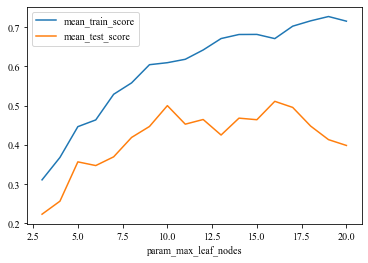

In [11]:
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()
from sklearn.model_selection import GridSearchCV
#param_grid = {'ccp_alpha': np.logspace(-5, 3, 19)}
param_grid_leaf = {'max_leaf_nodes': np.arange(3,21)}
grid = GridSearchCV(model_ExtraTreeRegressor, param_grid_leaf, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_max_leaf_nodes', 'mean_train_score')
results.plot('param_max_leaf_nodes', 'mean_test_score', ax = plt.gca())
print('max_leaf_nodes:' + str(grid.best_params_['max_leaf_nodes']) + '\nbest_score:' + str(grid.best_score_))
grid.score(X_test, y_test)

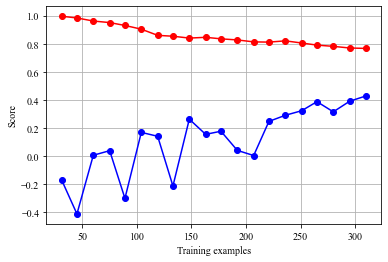

In [8]:
from learning_curves import LearningCurve
pipe_gradient = make_pipeline(MinMaxScaler(), GradientBoostingRegressor(random_state=0,learning_rate=grid_gradient.best_params_['gradientboostingregressor__learning_rate'],n_estimators=grid_gradient.best_params_['gradientboostingregressor__n_estimators']))
lc = LearningCurve()
lc.get_lc(pipe_gradient, X, y)

In [ ]:
X_test = [[6129,3,1252,2,37.3007145,-122.0113965,1960,2022]]
X_test2 = [[6000,4,1405,2,37.2990953,-122.0102861,1960,2022]]